In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# You can access the Fashion MNIST directly from TensorFlow.
# Import and load the Fashion MNIST data directly from TensorFlow:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Since the class names are not included with the dataset, store them here to use later when plotting the images:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 1. Explore the data, type below: 
print("Training images shape:", train_images.shape)
print("Number of training labels:", len(train_labels))
print("Testing images shape:", test_images.shape)
print("Number of testing labels:", len(test_labels))

              
# Scale these values to a range of 0 to 1 before feeding them to the neural network model.
# 2. Process the data, type here:
train_images = train_images/255.0 #pixels values fall in the range of 0 to 255
test_images =  test_images/255.0

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Feed the model
model.fit(train_images, train_labels, epochs=10)

# Compare how the model performs on the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)




4422102/4422102 [==============================] - 1s 0us/step
Training images shape: (60000, 28, 28)
Number of training labels: 60000
Testing images shape: (10000, 28, 28)
Number of testing labels: 10000
Epoch 1/10
1875/1875 [==============================] - 9s 2ms/step - loss: 0.4944 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3749 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3138 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.257

In [2]:
# 3. Make prediction, show the prediction array, type below: 
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[30])


# Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


313/313 [==============================] - 0s 1ms/step
[8.3462616e-17 1.4345924e-17 5.7129462e-19 4.1235566e-18 4.4286332e-14
 7.2463801e-17 3.4186527e-18 1.1987120e-15 1.0000000e+00 3.9469109e-21]


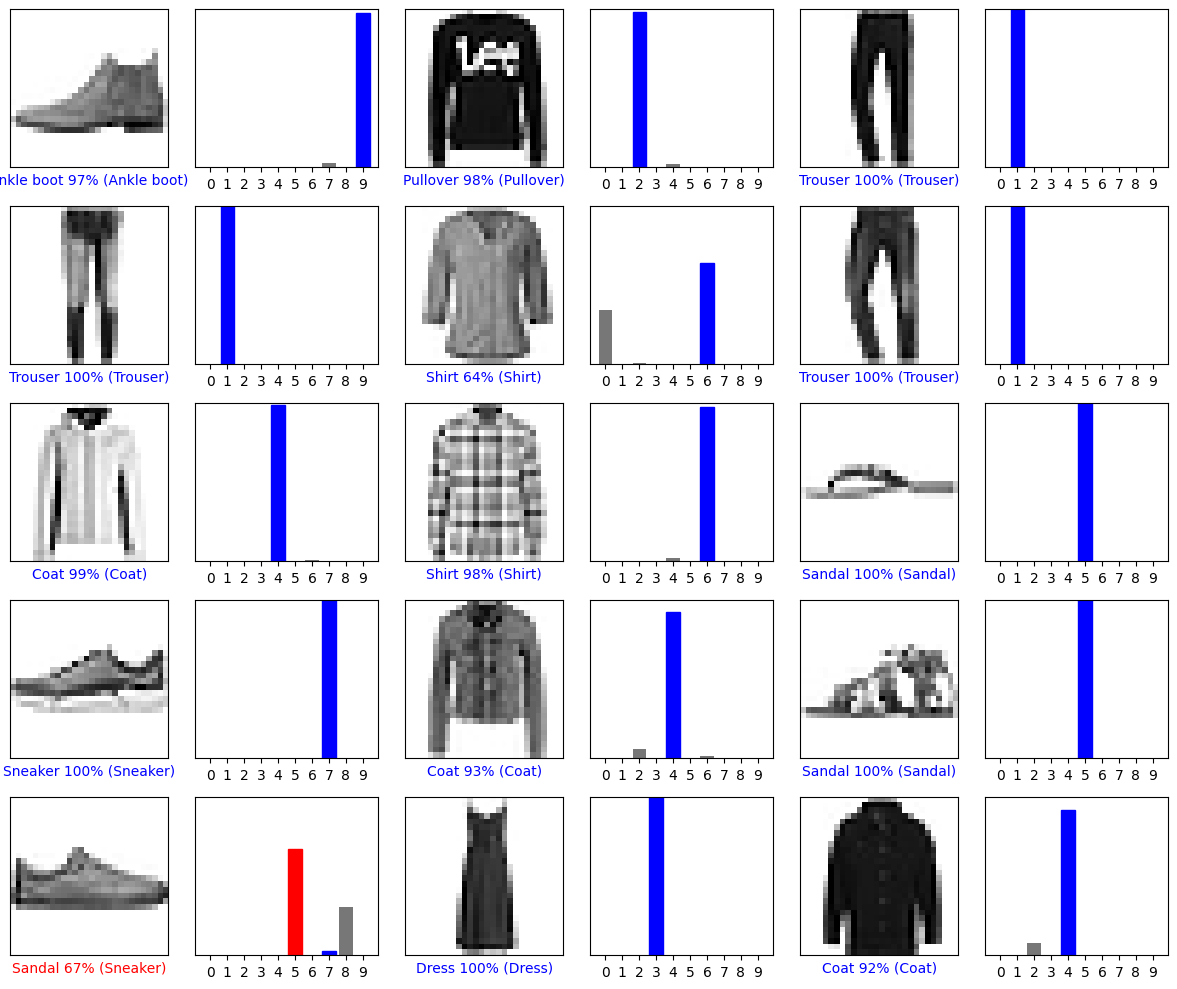

In [3]:
# 4. Verify prediction, show the result and answer in the report.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 22ms/step


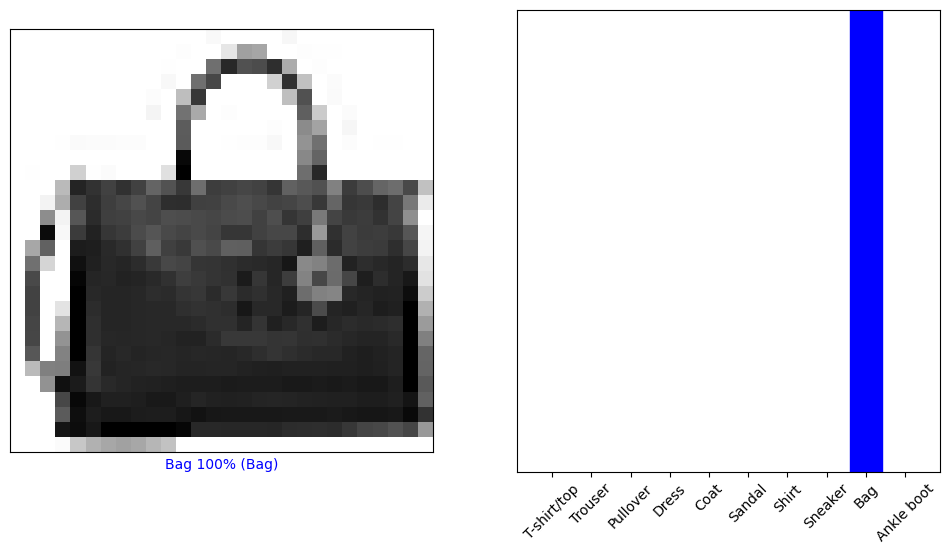

In [4]:
# 5. Use the trained model, grab the x th image from the test dataset, type below: $$
x = 30  # Choose the index of the image you want to predict

img = test_images[x]
print(img.shape)

img = (np.expand_dims(img, 0))# Add the image to a batch where it's the only member.
print(img.shape)

predictions_single = probability_model.predict(img)

#---------------------------------------------------------------------

# Print the image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(x, predictions_single, test_labels, test_images)

plt.subplot(1,2,2)
# Now predict the correct label for this image
plot_value_array(x, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)